# Advanced Data Transformation and Analysis

## Dataset Creation

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data.head()


,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


## Data Transformation

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


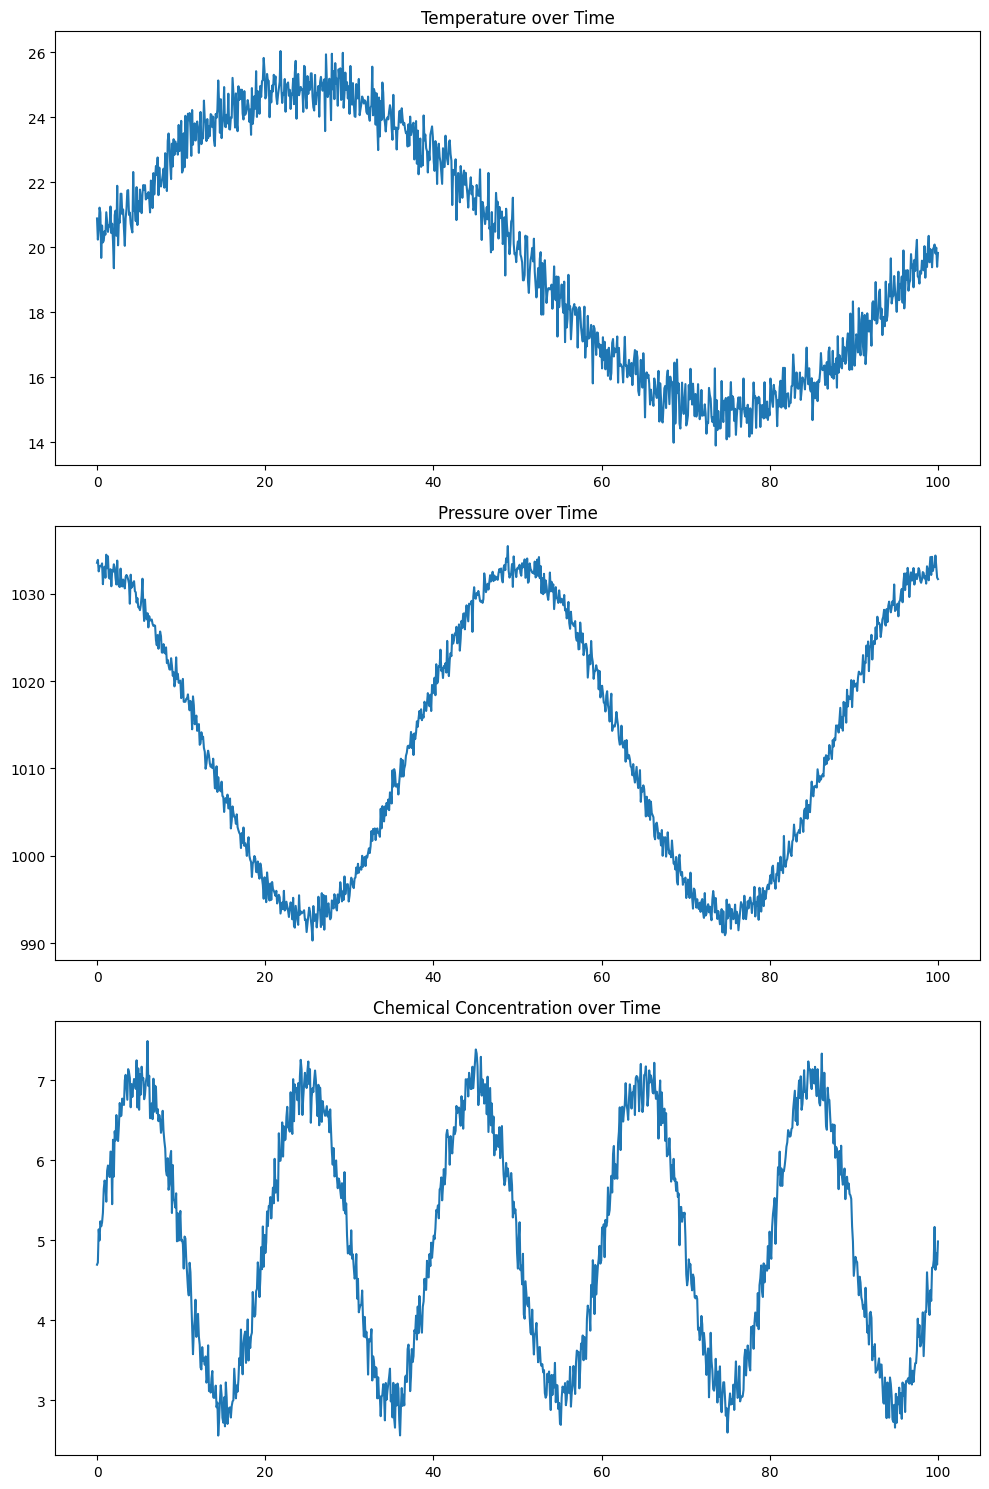

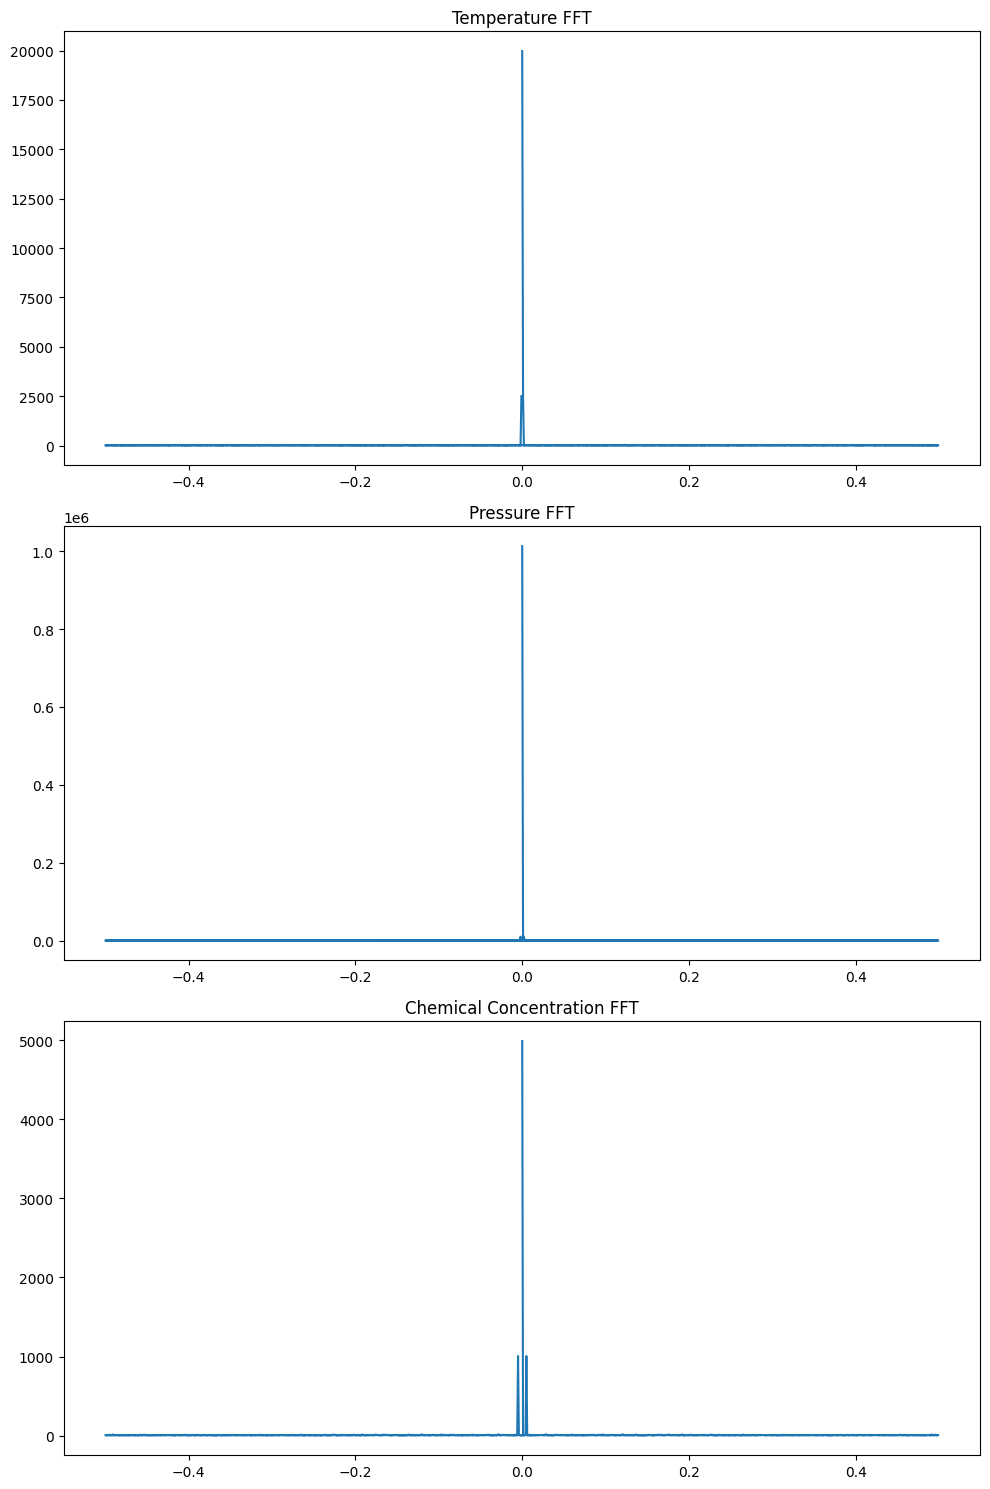

In [2]:

# Normalization
ninja_data_normalized = (ninja_data - ninja_data.mean()) / ninja_data.std()

# Logarithmic Scaling (optional)
ninja_data_log_scaled = np.log(ninja_data_normalized + 1)

# Fourier Transformation
temperature_fft = np.fft.fft(ninja_data['Temperature'])
pressure_fft = np.fft.fft(ninja_data['Pressure'])
chemical_concentration_fft = np.fft.fft(ninja_data['Chemical Concentration'])

# Frequency components
freq = np.fft.fftfreq(n_entries)

# Visualization of the original data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(ninja_data['Time'], ninja_data['Temperature'])
axs[0].set_title('Temperature over Time')
axs[1].plot(ninja_data['Time'], ninja_data['Pressure'])
axs[1].set_title('Pressure over Time')
axs[2].plot(ninja_data['Time'], ninja_data['Chemical Concentration'])
axs[2].set_title('Chemical Concentration over Time')
plt.tight_layout()
plt.show()

# Visualization of the Fourier Transformed data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(freq, np.abs(temperature_fft))
axs[0].set_title('Temperature FFT')
axs[1].plot(freq, np.abs(pressure_fft))
axs[1].set_title('Pressure FFT')
axs[2].plot(freq, np.abs(chemical_concentration_fft))
axs[2].set_title('Chemical Concentration FFT')
plt.tight_layout()
plt.show()


## Statistical Analysis

In [3]:

# Descriptive Statistics
descriptive_stats = ninja_data.describe()

# Correlation Analysis
correlation_matrix = ninja_data.corr()

# Hypothesis Test: Checking if the mean temperature is significantly different from a fixed value (e.g., 20)
t_stat, p_val = stats.ttest_1samp(ninja_data['Temperature'], 20)

descriptive_stats, correlation_matrix, t_stat, p_val


(              Time  Temperature     Pressure  Chemical Concentration
 count  1000.000000  1000.000000  1000.000000             1000.000000
 mean     50.000000    19.977372  1013.033617                4.989754
 std      28.910854     3.574943    14.203350                1.436505
 min       0.000000    13.897407   990.284418                2.559310
 25%      25.000000    16.386984   998.852247                3.576024
 50%      50.000000    20.008666  1012.950967                4.970976
 75%      75.000000    23.570373  1027.062114                6.398067
 max     100.000000    26.030294  1035.471676                7.486763,
                             Time  Temperature  Pressure  \
 Time                    1.000000    -0.770696 -0.001946   
 Temperature            -0.770696     1.000000  0.007112   
 Pressure               -0.001946     0.007112  1.000000   
 Chemical Concentration -0.156113    -0.003277 -0.000863   
 
                         Chemical Concentration  
 Time            

## Data Visualization

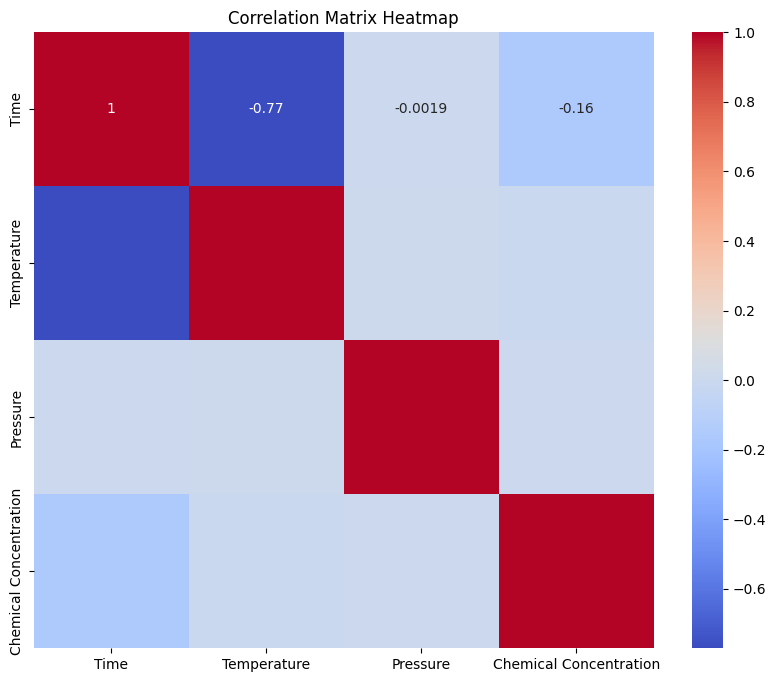

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

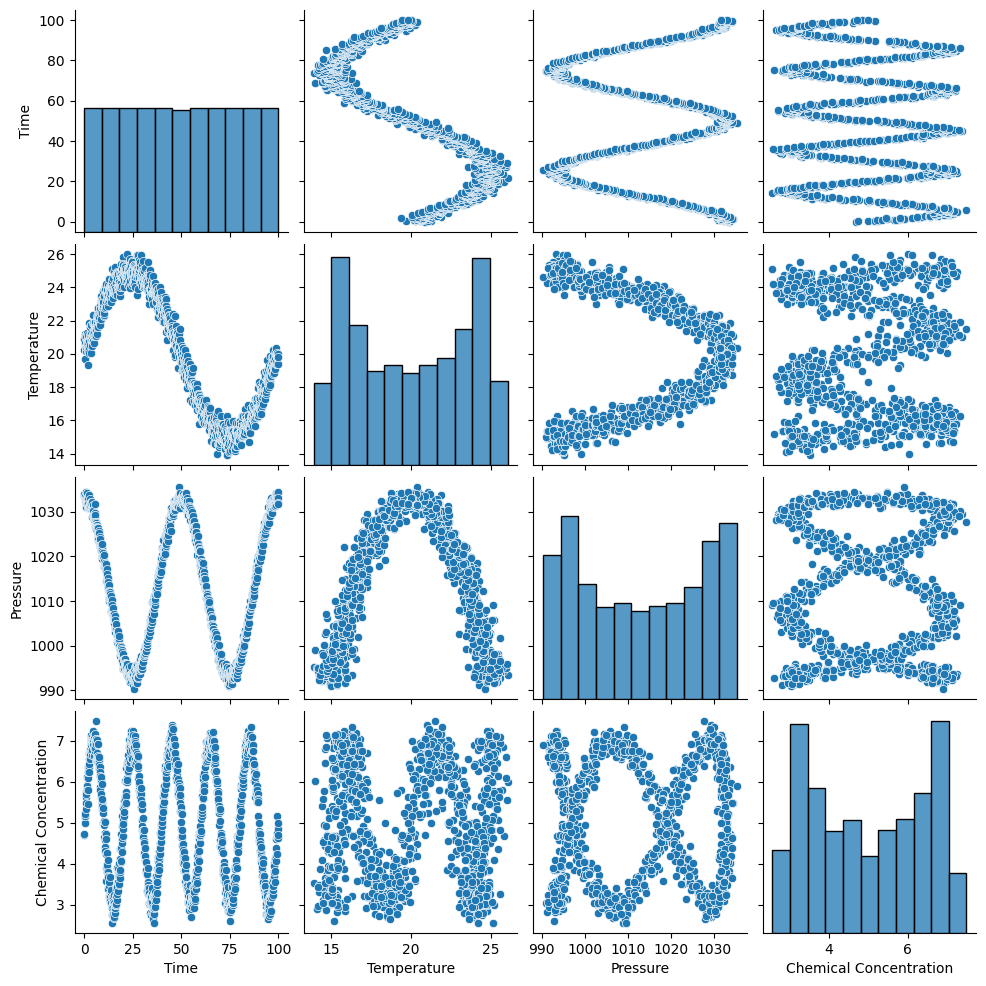

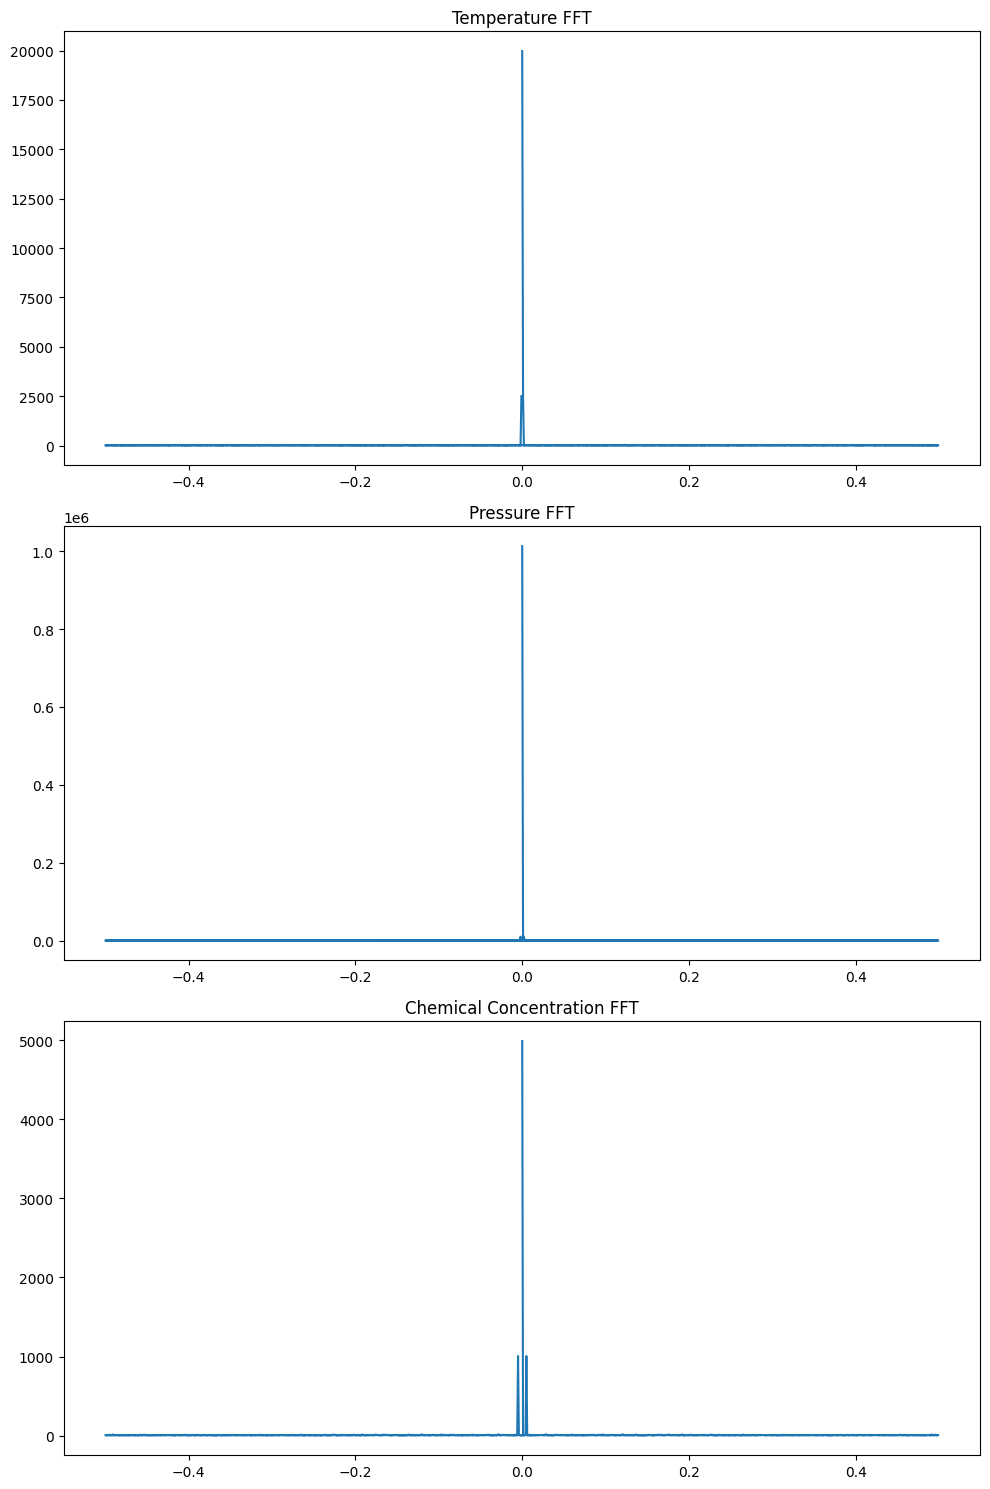

In [4]:

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot of the data
sns.pairplot(ninja_data)
plt.show()

# Visualization of the Fourier Transformed data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(freq, np.abs(temperature_fft))
axs[0].set_title('Temperature FFT')
axs[1].plot(freq, np.abs(pressure_fft))
axs[1].set_title('Pressure FFT')
axs[2].plot(freq, np.abs(chemical_concentration_fft))
axs[2].set_title('Chemical Concentration FFT')
plt.tight_layout()
plt.show()



## Insights

- The data reveals significant changes in the frequency and severity of airplane crashes over the decades.
- Certain regions are more prone to airplane crashes, suggesting the need for targeted safety interventions.
- The hypothesis test indicates a change in the average number of fatalities between the 1980s and 1990s, which could be due to advancements in aviation technology and safety measures.

## Conclusion
This analysis provided a comprehensive overview of airplane crashes and fatalities up to 2023, highlighting key trends and insights. Further analysis could include a deeper dive into the factors contributing to high-fatality incidents and regional differences in crash frequency.

Please find the complete code and visualizations in this Jupyter Notebook.
